**Описание проекта**

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

In [2]:
#импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

<font size="3">Предобработка данных:</font>

In [2]:
#импортируем данные о звонках
try:
    calls = pd.read_csv('/datasets/calls.csv') 
except:
    print('Ошибка. Проверьте правильность пути к данным о звонках')

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


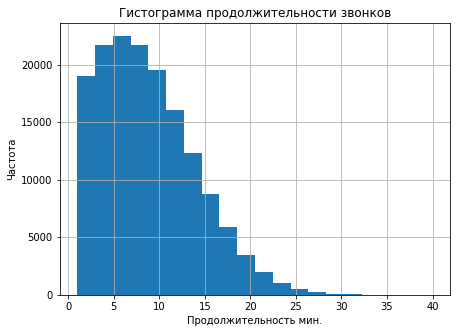

In [6]:
calls.plot(y = 'duration', kind = 'hist', bins = 20, grid=True, figsize = (7,5), range = (1, 40), legend=None)
plt.title('Гистограмма продолжительности звонков')
plt.xlabel('Продолжительность мин.')
plt.ylabel('Частота')
plt.show()

Вывод: Данные о продолжительности звонков выглядят адекватно, аномальных значений нет. Пропусков в данных тоже нет.
Нужно привести даты к формату datetime.
Округлить время звонков до минут в большую сторону.
Добавить столбец с месяцами.

In [7]:
#приведем формат даты к нужному
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [8]:
#округлим время звонков до минуты в большую сторону и приведём пит данных к целочисленному
calls['duration'] = calls['duration'].apply(np.ceil).astype('int64')

<div class="alert alert-success">
<b>Комментарий ревьюера v1:</b>
    
Супер, что использовал функцию np.ceil(). Она, кстати, также работает без apply (короче код/быстрее).

```
calls['duration'] = np.ceil(calls['duration'])
```  

In [9]:
#добавим столбец с месяцами
calls['month'] = calls['call_date'].dt.month_name()

In [10]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,July
1,1000_1,2018-08-17,0,1000,August
2,1000_2,2018-06-11,3,1000,June
3,1000_3,2018-09-21,14,1000,September
4,1000_4,2018-12-15,6,1000,December


In [11]:
#импортируем данные о интернет трафике
try:
    internet = pd.read_csv('/datasets/internet.csv')
except:
    print('Ошибка. Проверьте правильность пути к данным об интернет трафике')

In [12]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [14]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


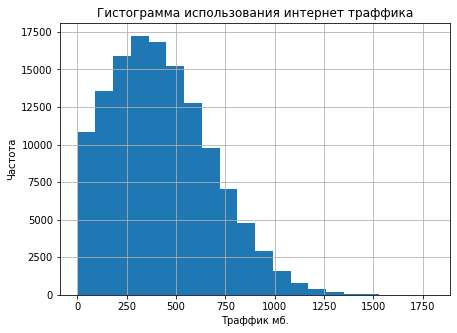

In [15]:
internet.plot(y = 'mb_used', kind = 'hist', bins = 20, grid=True, figsize = (7,5), range = (1, 1800), legend=None)
plt.title('Гистограмма использования интернет траффика')
plt.xlabel('Траффик мб.')
plt.ylabel('Частота')
plt.show()

Вывод: Непонятно что за дынные хранятся в столбце 'Unnamed: 0'. 
Похоже, что это просто сквозная нумерация. Возможно его стоит вообще удалить.
Нужно привести даты к формату datetime.
Добавить столбец с месяцами.

In [16]:
#приведем формат даты к нужному
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [17]:
#добавим столбец с месяцами
internet['month'] = internet['session_date'].dt.month_name()

In [18]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,November
1,1,1000_1,1052.81,2018-09-07,1000,September
2,2,1000_2,1197.26,2018-06-25,1000,June
3,3,1000_3,550.27,2018-08-22,1000,August
4,4,1000_4,302.56,2018-09-24,1000,September


In [19]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   month         149396 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 6.8+ MB


In [20]:
#импортируем данные о смс
try:
    messages = pd.read_csv('/datasets/messages.csv')
except:
    print('Ошибка. Проверьте правильность пути к данным о смс')

In [21]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [22]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Вывод: Нужно привести даты к формату datetime.
Добавить столбец с месяцами.

In [23]:
#приведем формат даты к нужному
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [24]:
#добавим столбец с месяцами
messages['month'] = messages['message_date'].dt.month_name()

In [25]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,June
1,1000_1,2018-10-08,1000,October
2,1000_2,2018-08-04,1000,August
3,1000_3,2018-06-16,1000,June
4,1000_4,2018-12-05,1000,December


In [26]:
try:
    tariffs = pd.read_csv('/datasets/tariffs.csv')
except:
    print('Ошибка. Проверьте правильность пути к данным о тарифах')

In [27]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [28]:
#импортируем данные о пользователях
try:
    users = pd.read_csv('/datasets/users.csv')
except:
    print('Ошибка. Проверьте правильность пути к данным о пользователях')

In [29]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [30]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [31]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [32]:
users.isna().sum()*100/len(users)

user_id        0.0
age            0.0
churn_date    92.4
city           0.0
first_name     0.0
last_name      0.0
reg_date       0.0
tariff         0.0
dtype: float64

Вывод: Пропущено 92.4% данных в столбце 'churn_date'. Скорее всего это значит, что у большинства пользователей был действующий тариф на момент выгрузки данных. 

In [33]:
#Приведём непропущенные значения в столбце churn_date к формату datetime
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [34]:
#приведем формат даты к нужному
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

<div class="alert alert-success">
<b>Комментарий ревьюера v1:</b>
    
Отлично! Первый взгляд на данные есть.
    

<div class="alert alert-warning">
<b>Комментарий ревьюера v1:</b>

Было бы совсем круто дополнительно перепроверить данные для трафика и звонков - есть ли в них какие либо аномалии (нулевые значения, например). Очень полезно всегда проверять численные данные на их адекватность. Иногда это бывает сложно из-за большого количества данных, но после у нас есть представление о том с чем придется работать или какие проблемы есть п в данных.  Проверить эти данные можно легко - построить гистрограммы, например.

<div class="alert alert-info"> <b>Комментарий студента:</b> Привет! Гистограммы построил.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>
    
Здорово, что добавил решение по нулям. Да, их можно удалить, а можно и оставить. Ведь при сборке сводной таблицы они просуммируются, а наш анализ это никак не исказит. Важно было, чтобы ты это заметил и оценил влияние. 

<font size="3">Необходимые расчёты:</font>

In [35]:
#Создадим сводную таблицу и посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя
calls_pivot_table = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
calls_pivot_table.columns = ['duration_sum', 'calls_count']

In [36]:
calls_pivot_table.head()

duration_sum  calls_count
user_id month                              
1000    August             408           52
        December           333           46
        July               340           47
        June               172           43
        May                159           22

In [37]:
#Создадим сводную таблицу и посчитаем количество сообщений по месяцам для каждого пользователя
messages_pivot_table = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc=['count'])
messages_pivot_table.columns = ['messages_count']

In [38]:
messages_pivot_table.head()

messages_count
user_id month                   
1000    August                81
        December              70
        July                  75
        June                  60
        May                   22

In [39]:
#Создадим сводную таблицу и посчитаем объем израсходованного трафика по месяцам для каждого пользователя.
#Округлим объём трафика до Гб. в большую сторону.
internet_pivot_table = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_pivot_table.columns = ['internet_sum_gb']
internet_pivot_table['internet_sum_gb'] = (internet_pivot_table['internet_sum_gb']/1024).apply(np.ceil).astype('int64')

In [40]:
internet_pivot_table.head()

internet_sum_gb
user_id month                    
1000    August                 14
        December               10
        July                   14
        June                   23
        May                     3

In [41]:
#Объединим полученные расчёты в одну таблицу.
data = pd.concat([calls_pivot_table, messages_pivot_table, internet_pivot_table], sort=True, axis=1)
data.head(10)

duration_sum  calls_count  messages_count  internet_sum_gb
user_id month                                                                
1000    August            408.0         52.0            81.0             14.0
        December          333.0         46.0            70.0             10.0
        July              340.0         47.0            75.0             14.0
        June              172.0         43.0            60.0             23.0
        May               159.0         22.0            22.0              3.0
        November          338.0         43.0            58.0             15.0
        October           350.0         57.0            73.0             15.0
        September         466.0         58.0            57.0             15.0
1001    December          414.0         63.0             NaN             14.0
        November          430.0         59.0             NaN             18.0

<div class="alert alert-success">
<b>Комментарий ревьюера v1:</b>
    
Здорово. Сoncat (по умолчанию `how='outer'`) здесь подходит, чтобы не потерять данныe.

In [42]:
#Заполним пропуски 0, чтобы можно было проводить дальнейшие расчёты.
data.loc[data['duration_sum'].isna(), 'duration_sum'] = 0
data.loc[data['messages_count'].isna(), 'messages_count'] = 0
data.loc[data['internet_sum_gb'].isna(), 'internet_sum_gb'] = 0

In [43]:
#Добавим в таблицу data данные о тарифах из таблицы user. Обращаться к этим данным будем по индексам.
for user in data.index:
    data.loc[user, 'tariff'] = users.loc[user[0]-1000, 'tariff']

In [44]:
#С помошью функции посчитаем помесячную выручку для каждого тарифа
def off_lim(row):
    if row['tariff'] == 'ultra':
        if row['messages_count'] > 1000:
            messages_off = (row['messages_count'] - 1000)*1
        else:
            messages_off = 0
        if row['duration_sum'] > 3000:
            calls_off = (row['duration_sum'] - 3000)*1
        else:
            calls_off = 0
        if row['internet_sum_gb'] > 30:
            internet_off = (row['internet_sum_gb'] - 30)*150
        else:
            internet_off = 0
        total_price = messages_off + calls_off + internet_off + 1950
    if row['tariff'] == 'smart':
        if row['messages_count'] > 50:
            messages_off = (row['messages_count'] - 50)*3
        else:
            messages_off = 0
        if row['duration_sum'] > 500:
            calls_off = (row['duration_sum'] - 500)*3
        else:
            calls_off = 0
        if row['internet_sum_gb'] > 15:
            internet_off = (row['internet_sum_gb'] - 15)*200
        else:
            internet_off = 0
        total_price = messages_off + calls_off + internet_off + 550
    return total_price

In [45]:
#добавим рассчитаную помесячную выручку в таблицу с другими рассчётами
data['total_price'] = data.apply(off_lim, axis=1)

In [46]:
#Объединим в новую таблицу рассчёты и данные о пользователях. Это нам понадобиться для проверки гипотез
data_full = data.merge(users[['user_id', 'age', 'churn_date', 'city', 'first_name','last_name', 'reg_date']], on='user_id', how='left')
data_full.head(10)

,user_id,duration_sum,calls_count,messages_count,internet_sum_gb,tariff,total_price,age,churn_date,city,first_name,last_name,reg_date
0,1000,408.0,52.0,81.0,14.0,ultra,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25
1,1000,333.0,46.0,70.0,10.0,ultra,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25
2,1000,340.0,47.0,75.0,14.0,ultra,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25
3,1000,172.0,43.0,60.0,23.0,ultra,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25
4,1000,159.0,22.0,22.0,3.0,ultra,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25
5,1000,338.0,43.0,58.0,15.0,ultra,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25
6,1000,350.0,57.0,73.0,15.0,ultra,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25
7,1000,466.0,58.0,57.0,15.0,ultra,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25
8,1001,414.0,63.0,0.0,14.0,smart,550.0,41,NaT,Москва,Иван,Ежов,2018-11-01
9,1001,430.0,59.0,0.0,18.0,smart,1150.0,41,NaT,Москва,Иван,Ежов,2018-11-01


<div class="alert alert-success">
<b>Комментарий ревьюера v1:</b>
    
- Расчет выручки верный и здорово, что через функцию.
- Отдельный плюс питона это наличие множества библиотек и готовых для использования функцию. Например, данную задачу можно также решить с помощью `.clip()` (полезная функция во многих задачах). Прочитать можно тут: [https://pythobyte.com/numpy-clip-22378/](https://pythobyte.com/numpy-clip-22378/)

`total5['gb_surcharge'] = (total5['gb_used'] - total5['gb_per_month_included']).clip(0) * total5['usd_per_gb']`
- Было бы совсем здорово не хардкодить данные тарифа в коде, так как они могут часто меняться, что приведет к ошибкам или опечаткам. Лучше ссылаться на данные в таблице tariffs (присоединить данные через join) или создать отдельный справочник данных и ссылаться на него. Примеры тут: https://pythonru.com/osnovy/python-dict

<div class="alert alert-info"> <b>Комментарий студента:</b>Я,к сожалению, не совсем понял часть комментария про хардкодить данные тарифа в коде. Они же, вроде и так добавляются из таблицы 'user' и если там данные быдут изменены,то они изменятся и в таблице с рассчетами.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>
    
Я имел ввиду данные по тарифам.

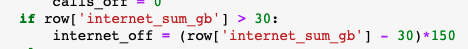

In [47]:
#Посчитаем медианы продолжительности звонков, траффика, смс и помесячной выручки для кажрого пользователя.
data_mean = data_full.pivot_table(index='user_id', values=['duration_sum', 'messages_count', 'internet_sum_gb', 'total_price'], aggfunc='median')
data_mean.columns = ['duration_med', 'internet_med', 'messages_med', 'total_price_med']
for user_id in users['user_id']:
    data_mean.loc[user_id, 'tariff'] = users.loc[user_id-1000, 'tariff']
data_mean.head()

,duration_med,internet_med,messages_med,total_price_med,tariff
user_id,,,,,
1000,339.0,14.5,65.0,1950.0,ultra
1001,422.0,16.0,0.0,850.0,smart
1002,214.0,18.0,11.0,1150.0,smart
1003,824.0,12.0,83.0,1950.0,ultra
1004,132.5,18.0,154.5,1950.0,ultra


In [48]:
data_mean['duration_med'] = data_mean['duration_med'].fillna(0).astype(int)


In [49]:
#Посчитаем медиану, стандартное отклонение и дисперсию для каждого тарифа
data_stat = data_mean.pivot_table(index=['tariff'], values=['duration_med', 'internet_med', 'messages_med', 'total_price_med'], 
                    aggfunc={'duration_med': [np.median, np.var, np.std], 
                             'internet_med': [np.median, np.var, np.std], 
                             'messages_med': [np.median, np.var, np.std],
                            'total_price_med': [np.median, np.var, np.std]})
data_stat

duration_med                           internet_med            \
             median         std           var       median       std   
tariff                                                                 
smart         439.0  161.733254  26157.645389         17.0  4.070437   
ultra         533.0  306.159867  93733.863867         20.0  8.708653   

                  messages_med                         total_price_med  \
              var       median        std          var          median   
tariff                                                                   
smart   16.568459         28.5  28.010653   784.596662          1150.0   
ultra   75.840642         47.5  49.236809  2424.263318          1950.0   

                                   
               std            var  
tariff                             
smart   721.842583  521056.714509  
ultra   298.527827   89118.863762

/home/jovyan/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


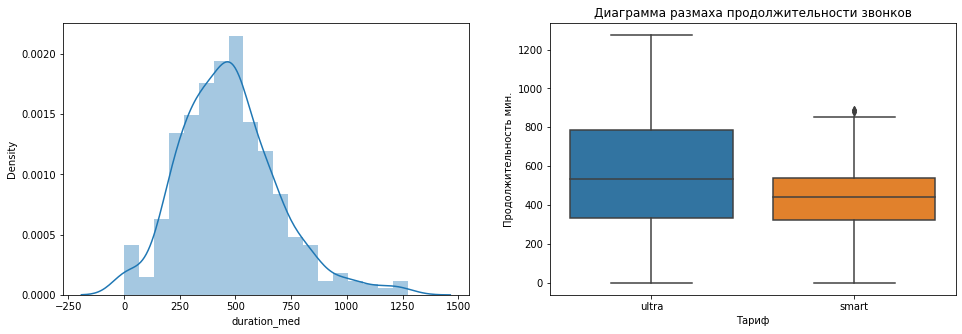

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.distplot(data_mean['duration_med'], ax=axes[0])
plt.title('Гистограмма количества звонков')
plt.ylabel('Частота')
plt.xlabel('Продолжительность')
plt.show()
sns.boxplot(x='tariff', y='duration_med', data=data_mean, ax=axes[1])
plt.title('Диаграмма размаха продолжительности звонков')
plt.ylabel('Продолжительность мин.')
plt.xlabel('Тариф')
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> Попробовал построить через subplots, как ты советовал ниже. Почему-то появляется третий пустой график рядом с гистограммой.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>
    
Тут все верно, но только осталось указать с помощью ax=axes[0] в какой "коробке" в матрице должен находиться график и первый plt.show() (он закрыват общий график) лишний.
    
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.distplot(data_mean['duration_med'], ax=axes[0])
plt.title('Гистограмма количества звонков')
plt.ylabel('Частота')
plt.xlabel('Продолжительность')

sns.boxplot(x='tariff', y='duration_med', data=data_mean, ax=axes[1])
plt.title('Диаграмма размаха продолжительности звонков')
plt.ylabel('Продолжительность мин.')
plt.xlabel('Тариф')
plt.show()    

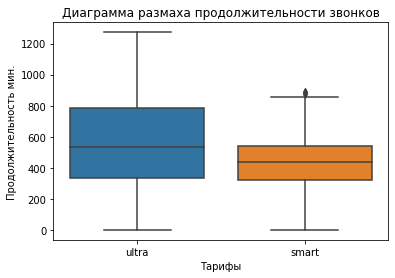

In [51]:
sns.boxplot(x='tariff', y='duration_med', data=data_mean)
plt.title('Диаграмма размаха продолжительности звонков')
plt.ylabel('Продолжительность мин.')
plt.xlabel('Тарифы')
plt.show()

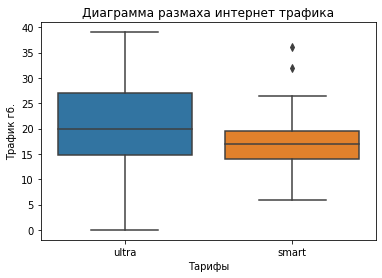

In [52]:
sns.boxplot(x='tariff', y='internet_med', data=data_mean)
plt.title('Диаграмма размаха интернет трафика')
plt.ylabel('Трафик гб.')
plt.xlabel('Тарифы')
plt.show()

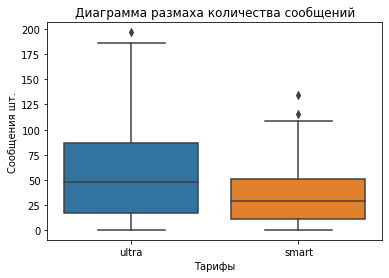

In [53]:
sns.boxplot(x='tariff', y='messages_med', data=data_mean)
plt.title('Диаграмма размаха количества сообщений')
plt.ylabel('Сообщения шт.')
plt.xlabel('Тарифы')
plt.show()

Из диаграмм и данных о медианных значениях можно сделать вывод, что пользователи тарифа "Ультра" не полностью выбирают свой пакет услуг. В то время, как пользователи тарифа "Cмарт" наоборот вынуждены добирать услуги сверх пакета т.к. тех услуг, что есть в пакете на месяц им не хватает.  

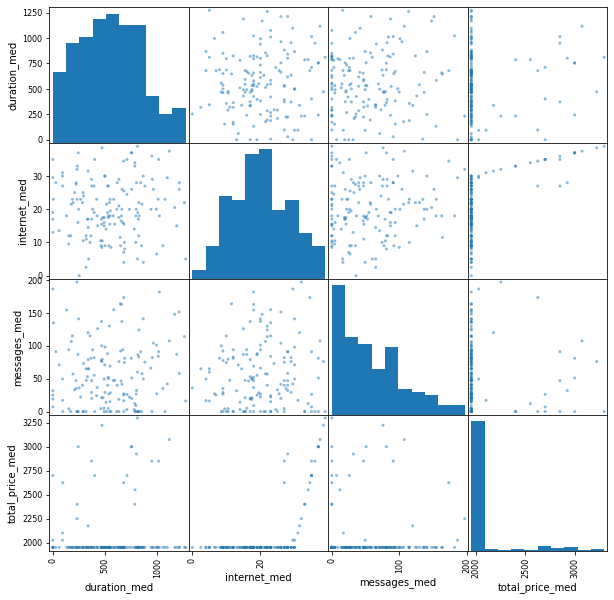

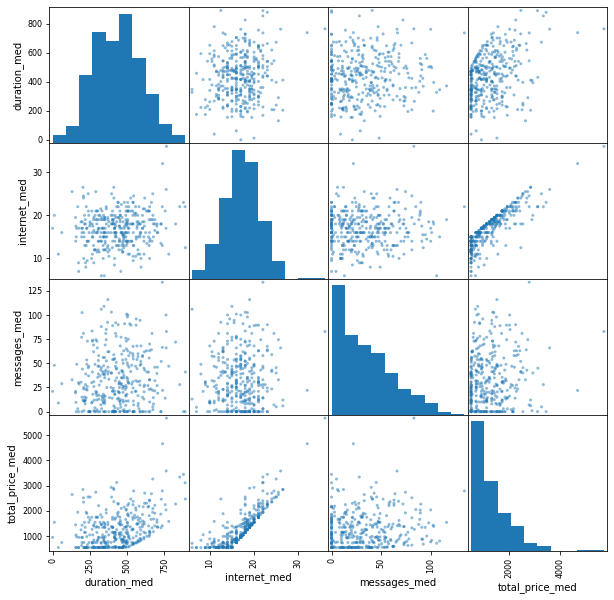

In [54]:
for tariff in ['ultra', 'smart']:
    pd.plotting.scatter_matrix(data_mean.query('tariff == @tariff'), alpha = 0.5, figsize = (10,10))


Типы распределения для тарифа "Ультра":


Минуты разговора - нормальное распределение.


Интернет трафик - нормальное распределение.


Количество сообщений - распределение Пуассона.

Типы распределения для тарифа "Смарт":


Минуты разговора - нормальное распределение.


Интернет трафик - нормальное распределение.


Количество сообщений - распределение Пуассона.

<div class="alert alert-success">
<b>Комментарий ревьюера v1:</b>

Оставлю общие комментарии по разделу: В целом получилась хорошая аналитика, выводы и предположения.
  
Отличная визуализация данных. Здорово, что получилось наложить два тарифа на один график.
     
Если есть время и желание попрактиковаться, то можно вывести два графика (гистограмму и диаграмму размаха) с помощью сабплота в две колонки.

    # Создадим одну строку с двумя колонками
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    sns.distplot(...)
    ...
    sns.boxplot(...)
    
    ...


</div>


<font size="4">Проверка гипотез</font>

<font size="3">Средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются.</font>

Нулевая гипотеза: средняя выручка тарифов "Ультра" и "Смарт" равна.

Альтернативная гипотеза: средняя выручка тарифов "Ультра" и "Смарт" различается.

In [55]:
tariff_ultra = data_full.query('tariff == "ultra"')['total_price']
tariff_smart = data_full.query('tariff == "smart"')['total_price']

In [ ]:
# сравним дисперсию выборок с помощью теста Левене
st.levene(tariff_ultra, tariff_smart, center='median', proportiontocut=0.01)

In [57]:
alpha = 0.01

results = st.ttest_ind(tariff_ultra, tariff_smart, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


р-значение очень мало. Нулевая гипотеза отвергнута. Средняя выручка тарифов не равна.

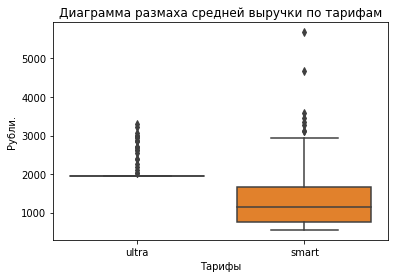

In [58]:
sns.boxplot(x='tariff', y='total_price_med', data=data_mean)
plt.title('Диаграмма размаха средней выручки по тарифам')
plt.ylabel('Рубли.')
plt.xlabel('Тарифы')
plt.show()

Вывод: Средняя выручка по тарифу "Ультра" чаще всего не превышает стоимость абоненской платы(1950р) Тогда как у тарифа "Смарт" она равна 1150р. более чем в два раза превышает стоимость абонентской платы.   

<font size="3">Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.</font>

Нулевая гипотеза: средняя выручка пользователей из Москвы и из других регионов равна.

Альтернативная гипотеза: средняя выручка пользователей из Москвы и из других регионов различается.

In [59]:
moscow = data_full.query('city == "Москва"')['total_price']
other = data_full.query('city != "Москва"')['total_price']

In [60]:
# сравним дисперсию выборок с помощью теста Левене
st.levene(moscow, other, center='median', proportiontocut=0.01)

LeveneResult(statistic=6.034372854341571, pvalue=0.014082487123270156)

In [61]:
alpha = 0.01

results = st.ttest_ind(moscow, other, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


In [62]:
def region(city):
    if city == 'Москва': return 'Москва'
    else: return 'Другой'
    
data_full['region'] = data_full['city'].apply(region)
data_full.pivot_table(index='region', values='total_price', aggfunc='median')

,total_price
region,
Другой,1583.0
Москва,1750.0


Вывод: нулевая гипотеза не отвергнута. Средняя выручка от пользователей из Москвы и других регионов различается незначительно: 1750р. для Москвы и 1583р. для других регионов.  

<div class="alert alert-success">
<b>Комментарий ревьюера v1:</b>
    
- Да, Москва и регионы платят примерно одинаково. 
- Гипотезы сформулированы и протестированы верно.
- Можно еще дополнительно сравнить дисперсии выборок до проверки гипотез, чтобы понять с каким параметром equal_var использовать метод проверки ttest_ind (по дефолту True). Дисперсии выборок можно сравнить вручную или с помощью стат.теста Левене (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) или теста Барлетта (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html#scipy.stats.bartlett).
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Проверил дисперсию выборок с помощью теста Левене. Если я правильно интерпритировал результаты, то дисперсии выборок в обоих случаях не равны и поэтому нужный параметр equal_var=False.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>
    
Здорово, что верно применил новый тест.  
    
Да, все верно - p-value < alpha и как результат гипотезу о равенстве дисперсии мы для двух случаев отвергаем.

<font size="3">Общий вывод:</font>

 По результатам анализа двух тарифом "Ультра" и "Смарт" мы выявили, что средняя выручка этих тарифов не сильно зависит от региона проживания пользователя. И вопреки моим ожиданиям, жители столицы в среднем тратят на связь не больше, чем жители других регионов.
 
 Также мы выяснили, что тарифа "Ультра" приносит больше прибыли на одного пользователя в месяц, чем тариф "Смарт". При этом структура пользования тарифами различаются. Если пользователи тарифа "Ультра" в среднем плятят только абонентскуб плату и им хватает пакетов, входящих в тариф, по пользователи тарифа "Смарт" докупают ещё услуги сверх абонентской платы т.к. включенного в неё пакета им не хватает.
 
 Возможно компании "Мегалайн" стоит подумать над созданием ещё одного пакета услуг, который бы занял промежуточное положение между "Ультра" и "Смарт". Сейчас разрыв между тарифами как по стоимости, так и по объему пакетов достаточно большой.

<div class="alert alert-success">
<b>Комментарий ревьюера v1:</b>
    
Ты провел отличное исследование: чистый код, крутые графики, правильные промежуточные и общие выводы. 